In [1]:
%matplotlib notebook
#%matplotlib ipympl
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

G = 6.6743*10**(-20) # in km^3/(kg*s^2)
M = 5.972*10**24 # Earth mass in kg
R = 6371 # earth radius in km

def v_orbital(h):
    return np.sqrt(G*M/(R+h))

def ODEs(t, ins):
    r = ins[0]
    v_r = ins[1]
    phi = ins[2]
    v_t = ins[3]
    r_dot = v_r
    v_r_dot = v_t**2/r - G*M/r**2
    phi_dot = v_t/r
    v_t_dot = -v_t*v_r/r
    return np.array([r_dot, v_r_dot, phi_dot, v_t_dot])

In [48]:
h_init = 35786 # height from surface, in km
v_init = 0.5 # in km/s, relative to "space station" in orbit
alpha_v = 0 # in deg with respect to tangent (0 means tangential in direction of orbit, -90 means straight "down")

v_orbit = v_orbital(h_init)
v_r0 = v_init*np.sin(np.deg2rad(alpha_v))
v_t0 = v_orbit + v_init*np.cos(np.deg2rad(alpha_v))
v0 = np.sqrt(v_r0**2 + v_t0**2)

t_start = 0
t_end = 1000000

initial = np.array([h_init+R, v_r0, 0, v_t0])

def end(t, ins):
    r = ins[0]
    return r-R # surface of the Earth
end.terminal = True
    
sol = scipy.integrate.solve_ivp(ODEs, (t_start, t_end), initial, events = end, max_step = 60)

ts = sol['t']
rs = sol['y'][0]
v_rs = sol['y'][1]
phis = sol['y'][2]
v_ts = sol['y'][3]

print(sol['message'])

The solver successfully reached the end of the integration interval.


<IPython.core.display.Javascript object>


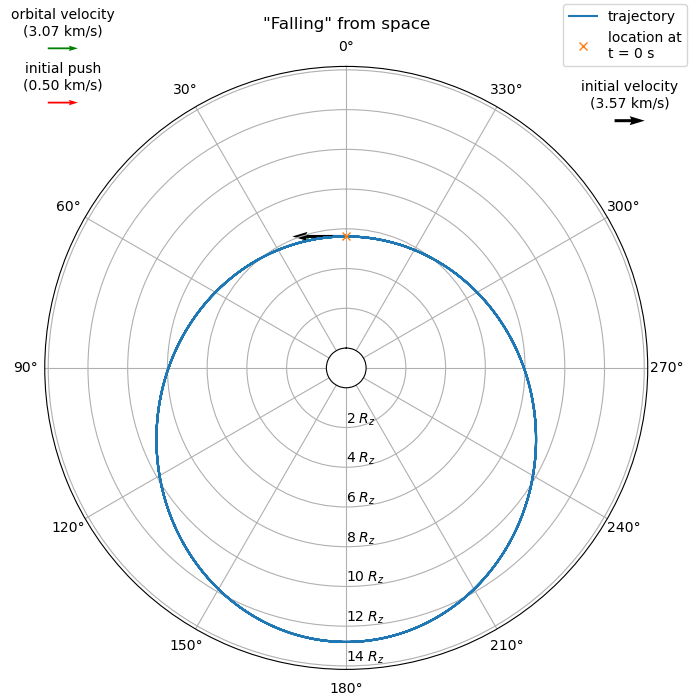

In [49]:
r_max = 1.1*np.max(rs)
scale = int(r_max/rs[0])

fig, ax = plt.subplots(figsize=(7,7), subplot_kw={'projection': 'polar'}, layout='constrained')
ax.set_title('"Falling" from space', va='bottom')

ax.plot(phis, rs, label='trajectory')
line, = ax.plot(phis[0], rs[0], 'x', label='location at\nt = {:.0f} s'.format(ts[0]))
arrow1 = ax.quiver(phis[0], rs[0], -v_orbit, 0, scale=scale*20, width=0.003, color='green')
arrow2 = ax.quiver(phis[0], rs[0], -v_t0+v_orbit, v_r0, scale=scale*20, width=0.003, color='red')
arrow3 = ax.quiver(phis[0], rs[0], -v_t0, v_r0, scale=scale*20, width=0.005, color='black')

#TODO
# 1) add slider for time -> draw point at that point in time (with velocity vector)
# 2) add interactive input for initial height, speed and angle

ax.set_rmax(r_max)
ax.set_rmin(R)
ax.set_rorigin(0)
r_ticks = np.arange((scale+1)*R, r_max, scale*R)
ax.set_rticks(r_ticks, [r'${:d}\;R_z$'.format(int((r-R)/R)) for r in r_ticks])
ax.set_rlabel_position(180)
ax.set_xticks(np.pi/180 * np.linspace(0, 360, 12, endpoint=False))
#ax.set_thetalim(0, 2*np.pi)
ax.set_theta_zero_location("N")
ax.grid(True)
ax.legend(loc=(0.86,1.00))
ax.quiverkey(arrow3, 0.97, 0.91, 2, 'initial velocity\n({:.2f} km/s)'.format(v0), coordinates='axes')
ax.quiverkey(arrow1, 0.03, 1.03, 2, 'orbital velocity\n({:.2f} km/s)'.format(v_orbit), coordinates='axes')
ax.quiverkey(arrow2, 0.03, 0.94, 2, 'initial push\n({:.2f} km/s)'.format(v_init), coordinates='axes')

#def update(t = 0):
#    line.set_xdata(phis[t])
#    line.set_ydata(rs[t])
#    arrow3.set_UVC(-v_ts[t], v_rs[t]) #TODO need to change position of vector...
#    fig.canvas.draw_idle()
#
#from ipywidgets import interact   
#x = interact(update, t = (0, len(ts)-1, 1));
plt.show()